In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time

In [10]:
# Fix large number of Monte Carlo iterations
M = 1000
# Fix large number of candidates
N = 1000
# Generate random range for each candidate's quality score
xmax = np.random.randint(1000, 9999, M)
# Calculate asymptotically optimal stopping barrier
K = int(np.ceil(N/np.e))
K

413

In [11]:
X = np.zeros((N,M))
# Generate random quality score for each candidate
for i in range(0, M):
    X[:,i] = np.random.randint(1, xmax[i], N)
# Create list g to store reward from each iteration
# Reward is 1 if best candidate chosen and 0 otherwise
# Goal is to maximise expected reward; i.e. to
# maximise the probability of hiring the best candidate
g = []

<IPython.core.display.Javascript object>


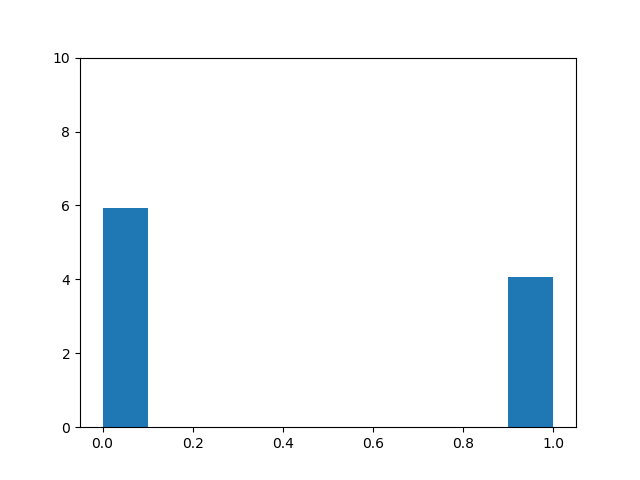

In [12]:
# Set up interactive plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
# Loop over Monte Carlo iterations
for j in range(0, M):
    # Ignore first K candidates
    for i in range(K, N):
        # Test whether each candidate is better than
        # the best of the first K candidates.
        # If this condition is met, stop and hire
        # this candidate.
        if X[i,j] >= np.amax(X[0:K,j]):
            hire = X[i,j]
            break
        # If no candidate arrives who is better than
        # the best of the first K candidates,
        # stop and hire the Nth candidate
        if np.amax(X[K:N,j]) < np.amax(X[0:K,j]):
            hire = X[N-1,j]
    # If the candidate hired is the best of the N
    # candidates, receive reward 1
    if hire == np.amax(X[:,j]):
        g.append(1)
    # Otherwise receive reward 0
    else:
        g.append(0)
    # Update histogram of 0s and 1s after each iteration
    weights = np.ones(len(g))/len(g)
    ax.clear()
    ax.set_ylim(0.0, 10.0)
    ax.hist(g, density = True)
    fig.canvas.draw()
    time.sleep(0.01)

In [13]:
# Estimate expected reward by Monte Carlo estimate
v = np.sum(g)/M
print(v)
# Find error between simulated expected reward
# and the asymptotically maximum expected reward
print(abs(v - 1/np.e))

0.406
0.0381205588286
